# ML project checklist
1. Frame the problem and look at the big picture
2. Get the data.
3. Explore the data to gain insights.
4. Prepare the data to better expose the underlying data patterns to ML algorithms
5. Explore many different models and shortlist the best ones.
6. Fine tune the models and combine them into a solution.
7. Present your solution.
8. Launch, monitor and maintain your system.

In [74]:
import pandas as pd
def load_housing_data(housing_path):
    return pd.read_csv(housing_path)

In [75]:
housing = load_housing_data(housing_path='datasets/housing/housing.csv')

In [76]:

housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [77]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


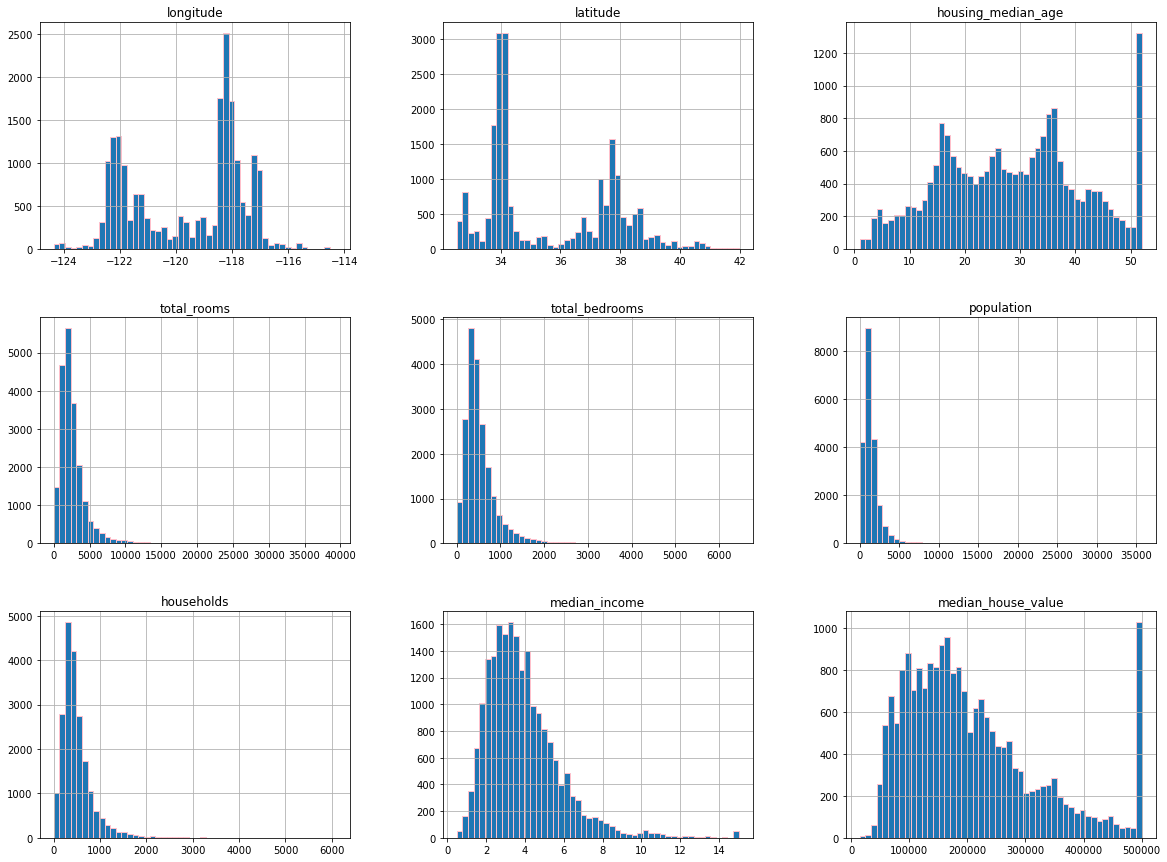

In [78]:
import matplotlib.pyplot as plt
housing.hist(bins=50,figsize=(20,15),edgecolor='pink')
plt.show()

In [79]:
import numpy as np
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled_indices = np.random.permutation(len(data))
    print(type(shuffled_indices), shuffled_indices)
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [80]:
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(housing, test_size=0.2,random_state=42)

<AxesSubplot:>

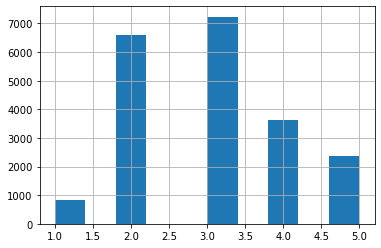

In [81]:
housing['income_cat'] = pd.cut(housing['median_income'],bins=[0.,1.5,3.0,4.5,6.,np.inf],labels=[1,2,3,4,5])
housing['income_cat'].hist()

In [82]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing,housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set=housing.loc[test_index]

In [83]:
print(strat_test_set['income_cat'].value_counts()/len(strat_test_set) * 100)

3    35.053295
2    31.879845
4    17.635659
5    11.458333
1     3.972868
Name: income_cat, dtype: float64


In [84]:
for set_ in (strat_test_set,strat_train_set):
    set_.drop('income_cat',axis=1,inplace=True)
housing = strat_train_set.copy()

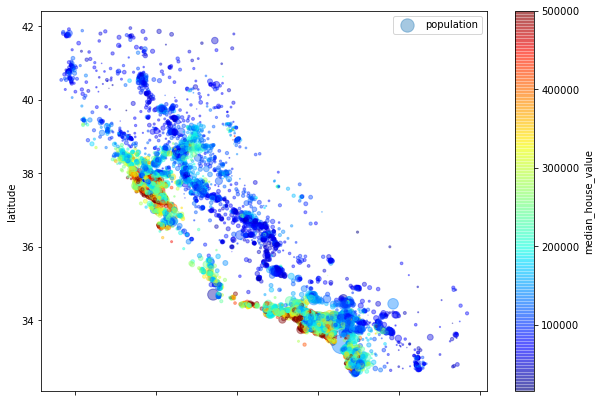

In [85]:
housing.plot(kind='scatter',x='longitude',y='latitude',alpha=0.4,s=housing['population']/100,label='population',figsize=(10,7),c='median_house_value',cmap=plt.get_cmap('jet'),colorbar=True)
plt.legend()

## Generating Pearson's correlation matrix

In [86]:
corr_matrix=housing.corr()

In [87]:
print(corr_matrix['median_house_value'].sort_values(ascending=False))
print(corr_matrix['total_rooms'].sort_values(ascending=False))

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64
total_rooms           1.000000
total_bedrooms        0.929379
households            0.918392
population            0.855109
median_income         0.200087
median_house_value    0.135097
longitude             0.048871
latitude             -0.039184
housing_median_age   -0.364509
Name: total_rooms, dtype: float64


<AxesSubplot:>

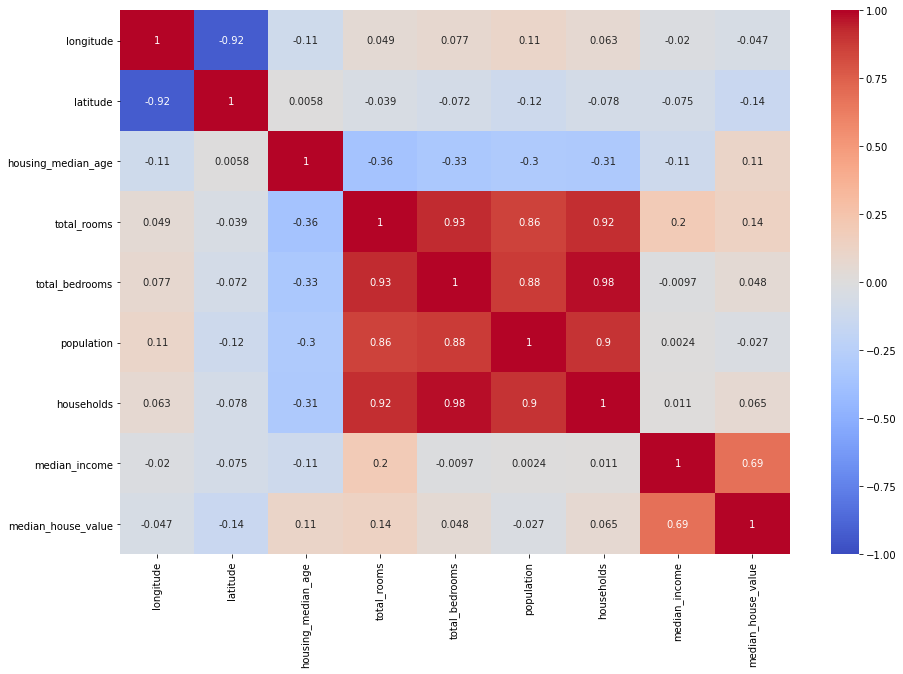

In [88]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.heatmap(data=corr_matrix,annot=True,vmin=-1.0,vmax=1.0,center=0.0,cmap='coolwarm')

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

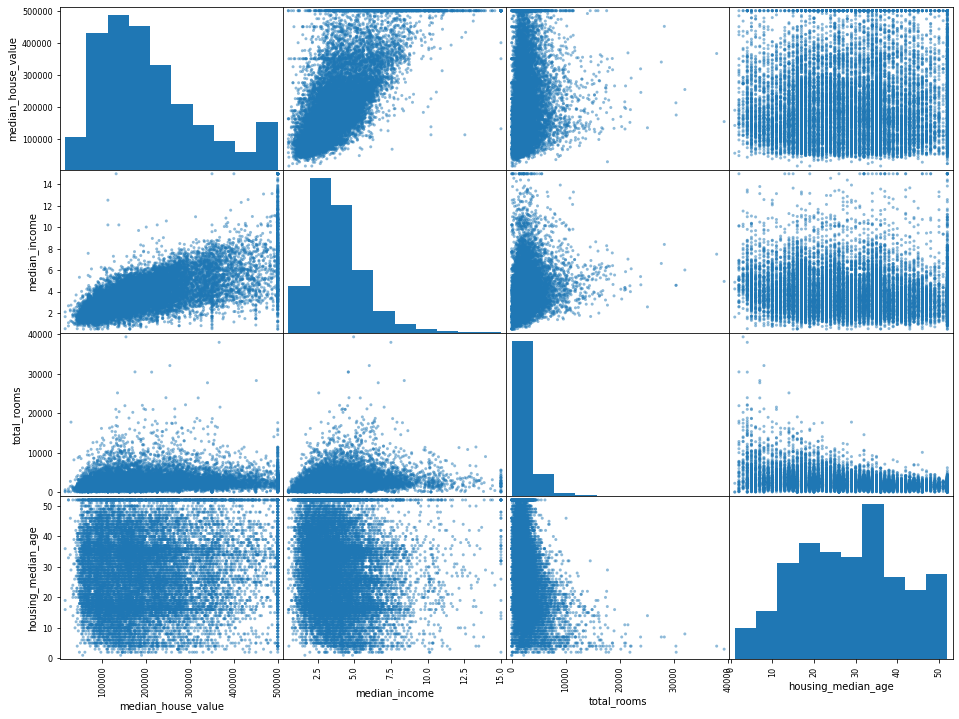

In [89]:
from pandas.plotting import scatter_matrix
attributes = ['median_house_value','median_income','total_rooms','housing_median_age']
scatter_matrix(housing[attributes],figsize=(16,12))


<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

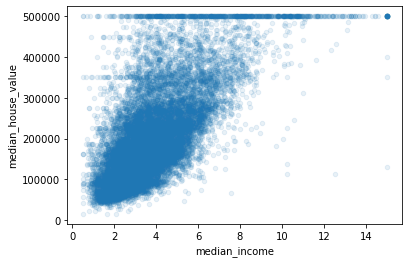

In [90]:
housing.plot(kind='scatter',x='median_income',y='median_house_value',alpha=0.1)

## Creating new attributes.

In [91]:
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64


<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

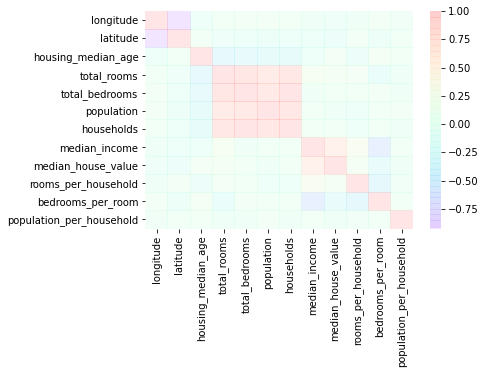

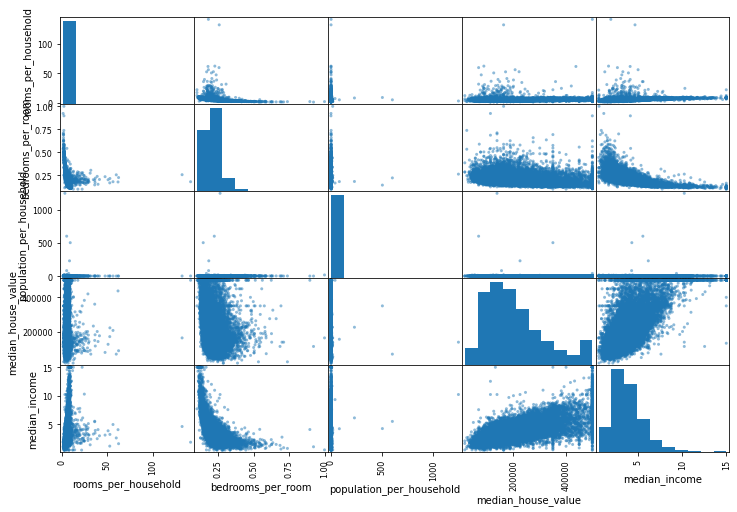

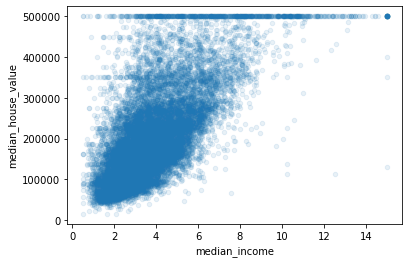

In [92]:
corr_matrix=housing.corr()
print(corr_matrix['median_house_value'].sort_values(ascending=False))
sns.heatmap(data=corr_matrix,cmap='rainbow',alpha=0.1)
attributes = ['rooms_per_household','bedrooms_per_room','population_per_household','median_house_value','median_income']
scatter_matrix(housing[attributes],figsize=(12,8))
housing.plot(kind='scatter',x='median_income',y='median_house_value',alpha=0.1)

In [93]:
housing = strat_train_set.drop('median_house_value',axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

# Cleaning the data.

In [94]:
from sklearn.impute import SimpleImputer
median_imputer=SimpleImputer(strategy='median')
housing_num = housing.drop(columns='ocean_proximity',axis=1)
median_imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [95]:
print(median_imputer.statistics_)
print(housing_num.median().values)

[-118.51     34.26     29.     2119.5     433.     1164.      408.
    3.5409]
[-118.51     34.26     29.     2119.5     433.     1164.      408.
    3.5409]


In [96]:
X=median_imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns,index=housing_num.index)
print(housing_num.index)

Int64Index([17606, 18632, 14650,  3230,  3555, 19480,  8879, 13685,  4937,
             4861,
            ...
            15270,  3754, 12166,  6003,  7364,  6563, 12053, 13908, 11159,
            15775],
           dtype='int64', length=16512)


In [97]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
housing_cat = housing[['ocean_proximity']]
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
print(housing_cat_encoded[:10])
print(ordinal_encoder.categories_)
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
print(housing_cat_1hot.toarray())
print(cat_encoder.categories_)

[[0.]
 [0.]
 [4.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]]
[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]
[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 ...
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]]
[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


In [98]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, households_ix = 3,4,5,6
class CombinedAttributeAdder(BaseEstimator,TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        #Initialize the instance variable
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X,y=None):
        #No fitting the data since we are only creating new attributes.
        return self
    def transform(self,X):
        #Creating new attributes from rooms, household and population.
        rooms_per_household = X[:,rooms_ix]/X[:,households_ix]
        population_per_household = X[:,population_ix]/X[:,households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:,bedrooms_ix]/X[:,rooms_ix]
            return np.c_[X,rooms_per_household,population_per_household,bedrooms_per_room]
        else:
            return np.c_[X,rooms_per_household,population_per_household]

attr_adder = CombinedAttributeAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

numpy `np.c_` translates slice objects to concatenation along the second axis.

In [99]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('attribs_adder',CombinedAttributeAdder()),
    ('std_scaler',StandardScaler())
])
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [100]:
from sklearn.compose import ColumnTransformer
num_attribs = list(housing_num)
print(num_attribs)
cat_attribs = ['ocean_proximity']
full_pipeline = ColumnTransformer([
    ('num',num_pipeline,num_attribs),
    ('cat',OneHotEncoder(),cat_attribs),
],sparse_threshold=0.3)
housing_prepared = full_pipeline.fit_transform(housing)

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']


In [101]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared,housing_labels)

LinearRegression()

In [102]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions: ",lin_reg.predict(some_data_prepared))
print("Labels: ",list(some_labels))


Predictions:  [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]
Labels:  [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [103]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels,housing_predictions)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

68628.19819848923


In [105]:
from sklearn.tree import DecisionTreeRegressor
model_1 = DecisionTreeRegressor()
model_1.fit(X=housing_prepared,y=housing_labels)
housing_predictions_1 = model_1.predict(housing_prepared)
model_1_mse = mean_squared_error(housing_labels,housing_predictions_1)
model_1_rmse = np.sqrt(model_1_mse)
print(model_1_rmse)


0.0


## Check for absurd values in `DecisionTreeRegressor`'s cross validation score. 

In [107]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator=model_1,X=housing_prepared,y=housing_labels, scoring='neg_mean_squared_error',cv=10)
model_1_rmse = np.sqrt(-scores)
print("Scores: ",scores)
print("Mean :", scores.mean())
print("Standard Deviation :",scores.std())

Scores:  [-4.71088509e+09 -4.48214623e+09 -4.74740666e+09 -4.60103165e+09
 -5.00300493e+09 -5.74549910e+09 -4.98830225e+09 -5.11716474e+09
 -5.77857060e+09 -4.93970254e+09]
Mean : -5011371379.402954
Standard Deviation : 418676047.6244036


In [110]:
import joblib
joblib.dump(model_1,'DecisionTreeRegressor_1.pkl')

['DecisionTreeRegressor_1.pkl']

In [115]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
param_grid = [
    {'n_estimators':[3,10,30],'max_features':[2,4,6,8]},
    {'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3,4]},
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(estimator=forest_reg,param_grid = param_grid,scoring='neg_mean_squared_error',return_train_score=True,cv=5,refit=True)
grid_search.fit(housing_prepared,housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [114]:
print("Best Params: ",grid_search.best_params_)

Best Params:  {'max_features': 6, 'n_estimators': 30}


In [116]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'],cvres['params']):
    print(np.sqrt(-mean_score),params)


63826.3554056639 {'max_features': 2, 'n_estimators': 3}
55845.13044943426 {'max_features': 2, 'n_estimators': 10}
53234.446227981454 {'max_features': 2, 'n_estimators': 30}
59260.92079553311 {'max_features': 4, 'n_estimators': 3}
52581.02629880815 {'max_features': 4, 'n_estimators': 10}
50659.31289835416 {'max_features': 4, 'n_estimators': 30}
58820.44225241444 {'max_features': 6, 'n_estimators': 3}
51526.82954351083 {'max_features': 6, 'n_estimators': 10}
49827.850507402065 {'max_features': 6, 'n_estimators': 30}
59516.05654177574 {'max_features': 8, 'n_estimators': 3}
51723.655056876785 {'max_features': 8, 'n_estimators': 10}
50251.86732115257 {'max_features': 8, 'n_estimators': 30}
62617.22274098037 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54778.81769746299 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60834.771361071114 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52304.263133499575 {'bootstrap': False, 'max_features': 3, 'n_estimators'

In [126]:
feature_importances = grid_search.best_estimator_.feature_importances_
print(feature_importances)
print(housing.columns)

[7.79161328e-02 7.18064643e-02 4.12742294e-02 1.78320950e-02
 1.55667898e-02 1.70851143e-02 1.58971987e-02 3.11240560e-01
 6.70823987e-02 1.09497389e-01 6.84721829e-02 1.26351769e-02
 1.64765225e-01 7.38477931e-05 4.05974614e-03 4.79544946e-03]
Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')


In [127]:
extra_attribs = ['rooms_per_hhold','pop_per_hhold','bedrooms_per_room']
cat_encoder = full_pipeline.named_transformers_['cat']
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
print(sorted(zip(feature_importances,attributes),reverse=True))

[(0.3112405602029284, 'median_income'), (0.16476522511707323, 'INLAND'), (0.10949738850638825, 'pop_per_hhold'), (0.07791613284681792, 'longitude'), (0.07180646426360539, 'latitude'), (0.06847218285082203, 'bedrooms_per_room'), (0.06708239869871525, 'rooms_per_hhold'), (0.04127422943526562, 'housing_median_age'), (0.01783209504487134, 'total_rooms'), (0.017085114283508934, 'population'), (0.015897198654558225, 'households'), (0.015566789787102861, 'total_bedrooms'), (0.012635176918326257, '<1H OCEAN'), (0.0047954494582456725, 'NEAR OCEAN'), (0.004059746138697997, 'NEAR BAY'), (7.38477930726446e-05, 'ISLAND')]


In [128]:
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop("median_house_value",axis=1)
y_test = strat_test_set['median_house_value'].copy()
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test,final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_rmse)

47882.378476144666


In [129]:
print(y_test.mean())

206315.4016472868


In [130]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors)-1,loc=squared_errors.mean(),scale=stats.sem(squared_errors)))

array([45882.5481097 , 49801.96899749])